In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import cv2

plt.rcParams["figure.figsize"] = (20,12)
sns.set_theme(style="white", palette="pastel")


In [3]:
# read dataset
data = pd.read_csv("./inputs/P5/digits.csv").sample(frac=1).reset_index(drop=True)
data = np.array(data)
print("Original dataset shape: ",data.shape)

# ------------------------------------------------------ A ------------------------------------------------------#
# reduce the dimensionality of the data to 15
pca = PCA(n_components=15)
pca.fit(data)

# transform the data to new spaces
data_ = pca.transform(data)
print("After reduce the dimensionality dataset shape: ",data.shape) 

Original dataset shape:  (1797, 64)
After reduce the dimensionality dataset shape:  (1797, 64)


In [4]:
index = 1
for vector in pca.components_:
    print("Eigenvector of #{0} :".format(index),vector,end="\n===================\n")
    index +=1    

Eigenvector of #1 : [ 2.76908233e-17 -1.73094629e-02 -2.23428823e-01 -1.35913317e-01
 -3.30322965e-02 -9.66340840e-02 -8.32945183e-03  2.26899593e-03
 -3.20516625e-04 -1.19308910e-01 -2.44451680e-01  1.48512785e-01
 -4.67319231e-02 -2.17740744e-01 -1.48136977e-02  4.47779246e-03
 -4.94136856e-05 -7.95419451e-02  8.33951424e-02  2.15915349e-01
 -1.72126848e-01 -1.63712098e-01  2.86444364e-02  4.23251763e-03
  9.85488416e-05  6.42319167e-02  2.54093313e-01 -3.56771093e-02
 -2.09462534e-01 -4.31311313e-02  5.13118730e-02  2.13422718e-04
  0.00000000e+00  1.59950890e-01  3.68690762e-01  1.64406819e-01
  8.52007967e-02  3.72982528e-02  2.15867008e-02  0.00000000e+00
  1.28865616e-03  1.06945299e-01  3.03067464e-01  2.47813049e-01
  2.09637280e-01  1.22325328e-02 -3.69458535e-02  1.61485096e-03
  6.93023616e-04 -8.35144150e-03 -5.58599141e-02  9.30533988e-02
  1.07387709e-01 -1.37734554e-01 -6.32879431e-02  9.61674805e-04
  9.55082806e-06 -1.40786808e-02 -2.35675473e-01 -1.41225599e-01
 -9.1

In [5]:
# ------------------------------------------------------ B ------------------------------------------------------#
search = GridSearchCV(KernelDensity(),  {'bandwidth': np.linspace(0.1, 5.1, 100)}, cv=5)
search.fit(data_)
search.best_params_

{'bandwidth': 3.1303030303030304}

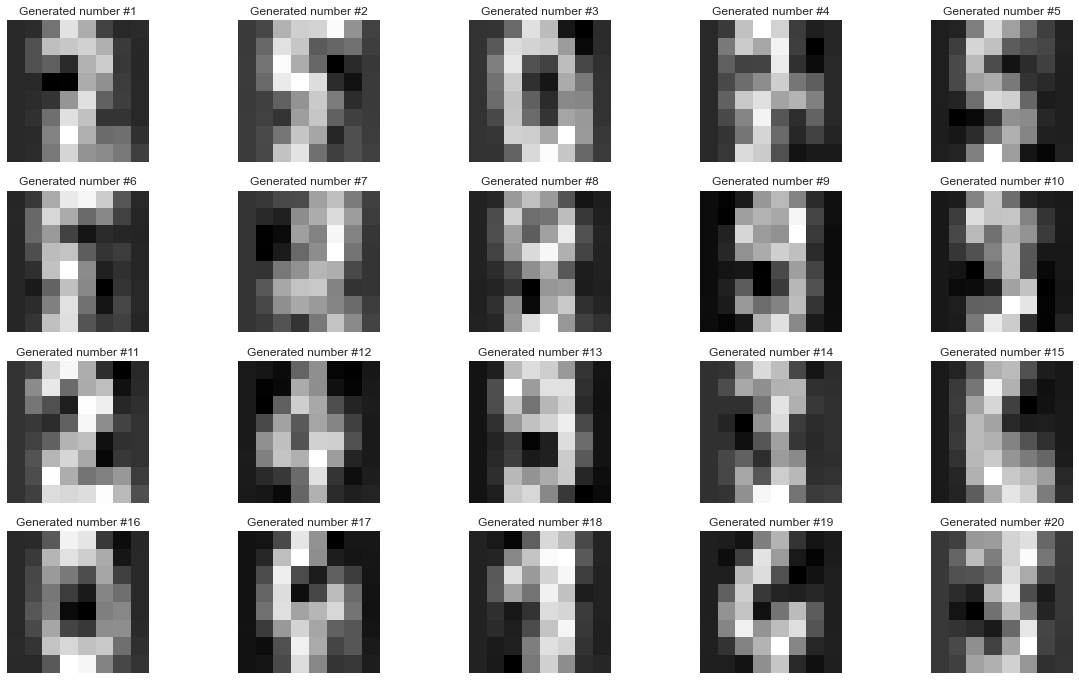

In [6]:
# ------------------------------------------------------ C ------------------------------------------------------#
kde = KernelDensity(kernel='gaussian', bandwidth=search.best_params_["bandwidth"]).fit(data_)
s = pca.inverse_transform(kde.sample(20))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.axis('off')
    plt.imshow(np.resize(s[i],(8,8)), cmap=plt.get_cmap('gray'))
    plt.title("Generated number #{0}".format(i+1))
plt.show()

